<a href="https://colab.research.google.com/github/pauline-johnson/machine-learning/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 - Concepts in Machine Learning



## 1. General Concepts



### Artificial Intelligence, Machine Learning, and Deep Learning


Artificial intelligence is "a branch of computer dealing with the simulation of intelligent behavior in computers" (1). Machine learning is a subset of artificial intelligence. Arthur Samuel defined machine learning as a "field of study that gives computers the ability to learn without being explicitly programmed" (1). The process of machine learning can be described as the training of a model to make useful predictions, using a data set (4). Deep learning is a subset of machine learning and usually refers to deep artificial nerual networks (2). Neural networks, which are loosely modeled around the brain, cluster and classify unlabeled data according to commonalities in input data (3).  


### Supervised, Unsupervised, and Reinforcement Learning

Supervised learning is a type of machine learning where the model is provided labeled training data, with a correct interpretation attached (expected output) (4). Unsupervised learning detects patterns in data, using an unlabeled training data set. Reinforcement learning deals with agents in an artificial environment that attempt to maximize reward/minimize failure. 

## 2. Basic Concepts


Linear models use one weight per feature to make predictions. Linear and logistic regression are types of linear models used in machine learning (5).  

### Linear Regression






Linear regression attempts to model the relationship between two variables by fitting a linear curve to the observed data. By convention is it written as (6):

####$ y' = b + w_1x_1 $

where

*   $ y'$ is the predicted label, or desired output
*   $b$ is the bias
*   $w_1$ is the weight of feature 1
*   $x_1$ is a feature, or known input

You may add on more features with separate weights ($..+ w_2x_2 + ..$)  for more complex models. The trained model predicts the label ($y'$) with given input values ($x_1, x_2, ..$).  







### Logisitic regression




Logistic regression chooses a value between 0 and 1, using a sigmoid function, from a linear model's label (7). It can be written as follows (8):

####$ y' = \frac{1}{1+e^{-z} }$

where

*   $y'$ is the output for that data point
*   $z$ is the linear model's label, or $ z = b + w_1x_1+..+w_nx_n$


#### Sigmoid Function:

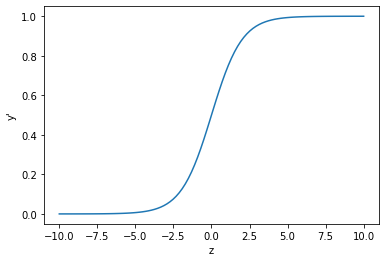

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('y\'')
plt.show()

In homework 3, we learned how to implement logistic regression from scratch and using a Keras model. 

### Gradient function


The gradient function is the slope of the tangent line at a point on a function, or in other words, how quickly the function is increasing or decreasing at a certain point. It can be represented by:

$\triangledown f(p) = [ \frac{\delta f}{\delta x_1}(p)...\frac{\delta f}{\delta x_n}(p)]$

### Gradient Descent


Gradient descent is a method of training your model to minimize loss. It provides a direction to go in so that each new set of hyperparameters takes on a lower loss than the last. You choose a random value for $x_1$, which corresponds to some amount of loss. Then, you keep taking gradient steps where the gradient is decreasing (since a negative gradient points in the direction of the greatest decrease of a function). This brings you closer and closer to the minimum loss. 

### Mini-batch Stochastic Gradient Descent

An important type of gradient descent we learned was mini-batch stochastic gradient descent. A batch is the total number of examples used to calculate the gradient every iteration. Stochastic gradient descent uses a batch size of 1 per iteration. Mini-batch SGD uses a batch size between 10 and 1,000 examples per iteration, which are chose randomly. This is more efficient than taking the entire batch at once, but less "noisily" than SGD (19).

### Learning Rate

The learning rate is used to train a model with gradient descent. For each gradient step, the gradient and the learning rate are multiplied together to bring you closer to the minimum loss. Choosing a good learning rate for your model is important, otherwise you could get stuck in a local minumum (vs. the absolute minimum), or your model could be very inefficient. A learning rate that is too small will take a very long time and one that is too large will continously overshoot the minimum (21).

## 3. Building a model

### Building a simple Keras model

This semester we focused on building Keras models.
Below is an excerpt of my homework 3 code (9). The Sequential model is a linear stack of layers. A layer is a data-processing module that takes in input of at least one tensor and outputs at least one tensor (13). They are the building blocks of of a neural network. Most relatively simple models use the sequential model. The input data in homework 3 had two features, so we will add a Dense layer that accepts two-dimensional input with two rows and output with one row, for the label.



In [16]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=(2,)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Convolutional Neural Networks

A convolutional nerual network, or CNN, is a neural network where at least one of its layers is a convolutional layer (10).  They are often for image recognition, as discussed in lecture for the classication of MNIST digits. Below is an excerpt of the code that we used in lecture (11). In general, a CNN is made up of a combination of convolutional layers, pooling layers, and dense layers (20). In this case, the convolutional layer is the first layer in which we use the pixels in the images to extract features. The input shape is 28x28 since that is the size of the image. The second dense layer has 10 neurons, each of which is a digit class (0,1,..9) (12). 


In [18]:
import tensorflow as tf

# define sequential model
network = tf.keras.models.Sequential()

# add two layers to model
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(tf.keras.layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling a model

Once you have defined the architecture of your neural network, you need to configure the learning process and compile your model. Keras requires two parameters to do this, a loss function and an optimizer.

### Loss Functions

A loss function is the quantity that will be minimize during the training of a model (13). Loss functions evaluate how well the model models your dataset. Some common loss functions are binary cross-entropy (for classification models that output a value between 0 and 1) and mean-squared error. A complete list of loss functions can be found at https://keras.io/losses/.

Below is a table of popular loss functions from (14). 

| Problem type              | Last layer activation  | Loss function              | 
|:-:                        |:-:                     |:-:                         |
| Binary classification     | sigmoid                | binary_crossentropy        |
| Multiclass, single-label  | softmax                | categorical_crossentropy   |
| Mutlticlass, multi-label  | sigmoid                | binary_crossentropy        |
| Regression to real values | none                   | mse                        |
| Regression to \[0,1\]     | sigmoid                | mse or binary_crossentropy |

### Optimizers

Optimizers tie together loss function and model parameters by updating the model in response to loss function's output. A complete list of optimizers can be found at https://keras.io/optimizers/.

### Metric Functions

An optional parameter is a metric function, which is used to judge the performance of the model (14). A complete list of metrics can be found at https://keras.io/metrics/.

Below is an example of compiling a model, taken from my homework 3 (9). 

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd',
              metrics=['accuracy'])


## 5. Training a model


Training a model involves learning it with training data and testing it with test data. To do this, you want to split up your data into training and test sets. It is important that your training and test data are completely separate. If your test data leaks into your training data, you will not have a true understanding of how well your model works. When training a model, you must also specify the number of epochs (iterations) and the batch size. 

### Overfitting

Intuitively, you might think that the lower the loss during training, the better a model is, but this is not always the case. A model that *overfits* achieves low loss during training, but performs poorly when measured with the test data.  This happens when a model is more complex than it needs to be. To remedy this, you might want to choose a less complex model. From (15), "The less complex an ML model, the more likely that a good empirical result is not just due to the peculiarities of the sample". 



#### Underfitting

Underfitting happens when a model performs poorly on training data. To avoid this, you might want to provide a wider variety of data or make your model more complex.


We can train a model like so:
```
model.fit(training_data, training_labels, epochs=200, batch_size=500,verbose=1)
```

## 6. Fine-tuning a pretrained model

Fine-tuning is when you take a model that has been pre-trained on a large dataset and continue training it on your own smaller dataset. This is very useful when the data that you are trying to apply the pre-trained model to is similar to the training data of that model. 
In homework 4, I froze the convolutional base and then added layers on top to fine-tune (17). 

In [0]:
from keras.applications import Xception
from keras import layers
from keras import models
from keras import optimizers


conv_base = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

# Freeze convolutional base.
conv_base.trainable = False

# Add layers on top to fine-tune.
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))


After doing this, we can further improve our model by fine-tuning the upper layers of the pre-trained model (16). We want to use a smaller learning rate since the pre-trained weights are already very accurate and we do not want to distort the model's reliability (18).

In [26]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv2d_3':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

model.compile(
    loss='binary_crossentropy',
    # choose a smaller learning rate
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________


# Conclusion

As you can see, I learned a lot in this course! I found Google's crash course in machine learning to be very useful throughout the learning process.

## Sources




1. https://github.com/schneider128k/machine_learning_course/blob/master/slides/1_a_slides.pdf

2. https://pathmind.com/wiki/ai-vs-machine-learning-vs-deep-learning

3. https://pathmind.com/wiki/neural-network

4. https://github.com/schneider128k/machine_learning_course/blob/master/slides/1_b_slides.pdf

5. https://developers.google.com/machine-learning/glossary#linear_regression

6. https://developers.google.com/machine-learning/crash-course/descending-into-ml/linear-regression

7. https://developers.google.com/machine-learning/glossary#logistic_regression

8. https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability

9. https://github.com/pauline-johnson/machine-learning/blob/master/HW3/HW3.ipynb

10. https://developers.google.com/machine-learning/glossary/#convolutional_layer

11. https://github.com/schneider128k/machine_learning_course/blob/master/mnist_digits_classification_dense_layers.ipynb

12. https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

13. https://github.com/schneider128k/machine_learning_course/blob/master/slides/4_slides.pdf

14. https://github.com/schneider128k/machine_learning_course/blob/master/keras_basics.md

15. https://developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting

16. https://colab.research.google.com/drive/1uVLIUWdT7--b59vM7NaSHkB-qFcu30jU#scrollTo=dI5rmt4UBwXs

17. https://github.com/pauline-johnson/machine-learning/blob/master/HW4/HW4_3a.ipynb

18. https://flyyufelix.github.io/2016/10/03/fine-tuning-in-keras-part1.html

19. https://github.com/schneider128k/machine_learning_course/blob/master/slides/2_f_slides.pdf

20. https://developers.google.com/machine-learning/glossary#convolutional_neural_network

21. https://github.com/schneider128k/machine_learning_course/blob/master/slides/2_e_slides.pdf